## Dual Governance Agent-based modelling


In [1]:
import pandas as pd
import numpy as np

# radCAD
from radcad import Model, Simulation, Experiment
from radcad.engine import Engine, Backend

# Experiments
# from model import run
from model.parts.utils import *

pd.options.display.float_format = "{:.2f}".format

%matplotlib inline

ModuleNotFoundError: No module named 'model'

In [2]:
from model.state_update_blocks import state_update_blocks
from model.sys_params import sys_params
from model.types.scenario import Scenario
from model.utils.initialization import generate_initial_state
from model.utils.postprocessing import postprocessing

MONTE_CARLO_RUNS = 1
TIMESTEPS = 50

state = generate_initial_state(Scenario.SingleAttack)

model = Model(
    initial_state=state,
    params=sys_params,
    state_update_blocks=state_update_blocks,
)

simulation = Simulation(model=model, timesteps=TIMESTEPS, runs=MONTE_CARLO_RUNS)
simulation.engine = Engine(backend=Backend.MULTIPROCESSING, processes=5)

result = simulation.run()
df = pd.DataFrame(result)
post_processing = postprocessing(df)

total proposals at timelock  0
submitting proposal at  2024-08-18 06:44:49.522124
actually need to damage
Proposal ID 1 is going to be canceled.
last_canceled_proposal 0
need to cancel proposals
[1]
healing actors health
rare case
rare case


In [ ]:
df = pd.DataFrame(result)
last_state_of_proposals = df["proposals_type"].tail(1)

total_damage_of_proposals = sum(
    [proposal[proposal_id]["damage"] for proposal in last_state_of_proposals for proposal_id in proposal]
)
total_number_of_proposals = sum([len(proposal) for proposal in last_state_of_proposals])

average_damage_per_proposal = int(
    total_damage_of_proposals / total_number_of_proposals if total_number_of_proposals != 0 else 0
)

last_submitted_proposals = post_processing["proposals_submitted_count"].tail(1)
last_canceled_proposals = post_processing["proposals_canceled_count"].tail(1)

submitted_proposals = sum([proposal for proposal in last_s_p])

canceled_proposals = sum([proposal for proposal in last_s_p])

display(Markdown("### Results Summary"))
display(Markdown(f"**Submitted Proposals:** {submitted_proposals}"))
display(Markdown(f"**Canceled Proposals:** {canceled_proposals}"))
display(Markdown(f"**Total Damage of Proposals:** {total_damage_of_proposals}"))
display(Markdown(f"**Total Number of Proposals:** {total_number_of_proposals}"))
display(Markdown(f"**Average Damage per Proposal:** {average_damage_per_proposal}"))

### Results Summary

**Submitted Proposals:** 1

**Canceled Proposals:** 1

**Total Damage of Proposals:** 100

**Total Number of Proposals:** 1

**Average Damage per Proposal:** 100

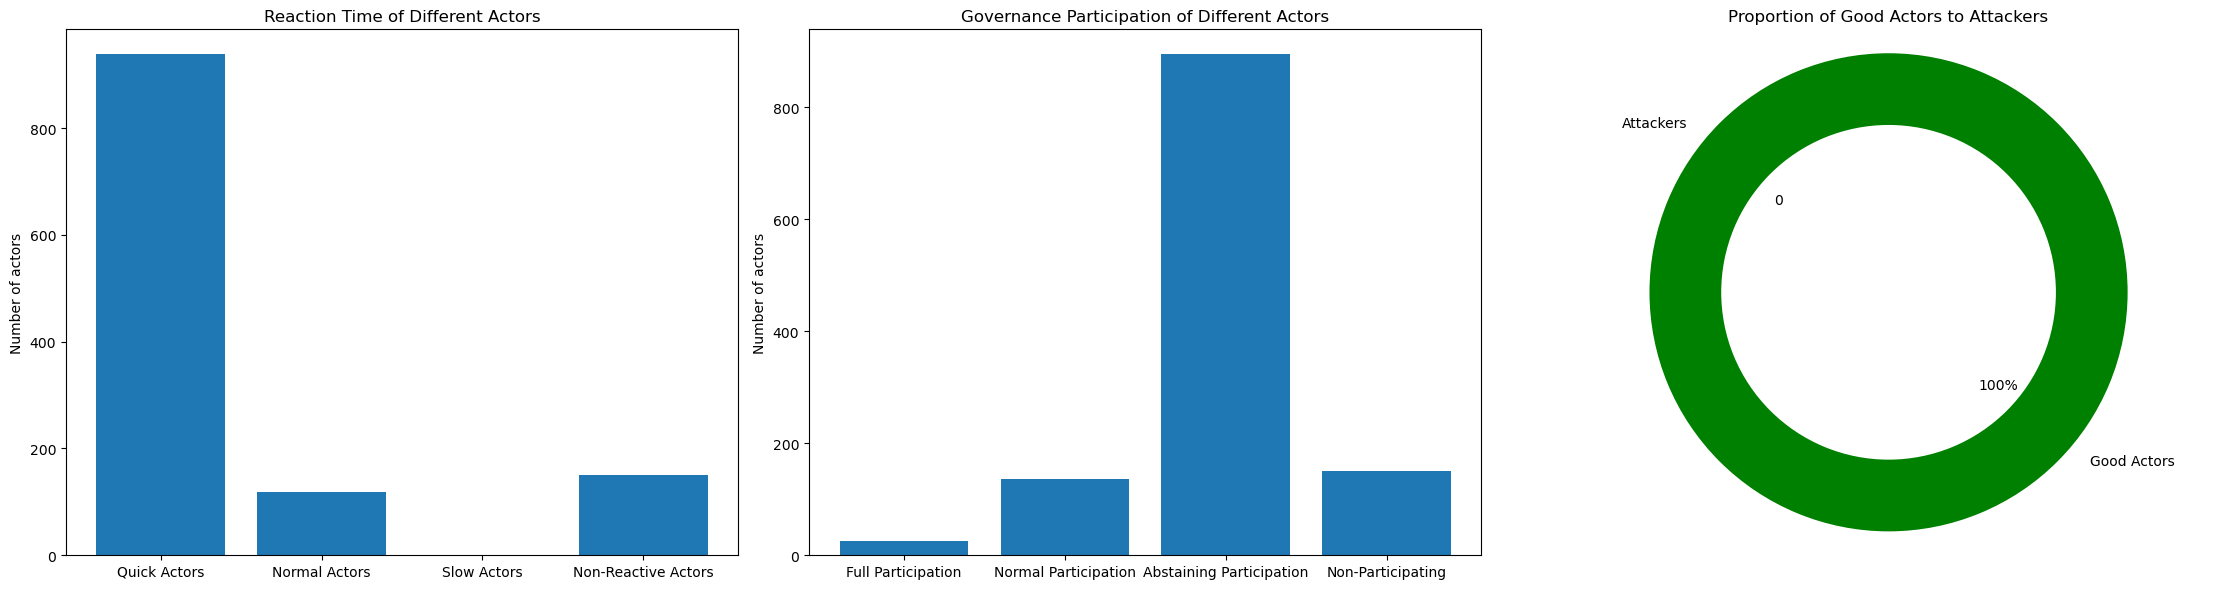

In [158]:
def create_charts(post_processing, bar_charts, donut_chart):
    num_bar_charts = len(bar_charts)
    fig, axs = plt.subplots(1, num_bar_charts + 1, figsize=(7.5 * (num_bar_charts + 1), 6))

    if num_bar_charts == 1:
        axs = [axs[0], axs[1]]  # Ensure axs is always a list
    elif num_bar_charts == 2:
        axs = [axs[0], axs[1], axs[2]]

    # Plot bar charts
    for i, (attributes, labels, title, ylabel) in enumerate(bar_charts):
        values = [getattr(post_processing, attr).tail(1).values[0] for attr in attributes]
        axs[i].bar(labels, values)
        axs[i].set_title(title)
        axs[i].set_xlabel("")
        axs[i].set_ylabel(ylabel)

    # Plot donut chart
    labels, sizes, colors, title = donut_chart
    values = [getattr(post_processing, attr).tail(1).values[0] for attr in sizes]
    axs[-1].pie(
        values,
        labels=labels,
        colors=colors,
        autopct=lambda p: f"{p:.0f}%" if p > 0 else "0",
        startangle=140,
        wedgeprops=dict(width=0.3),
    )
    axs[-1].set_title(title)
    axs[-1].axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.tight_layout()
    plt.show()


# Example usage
values = [
    "total_quick_actors_reaction_time",
    "total_normal_actors_reaction_time",
    "total_slow_actors_reaction_time",
    "total_non_reactive_actors_reaction_time",
]
values_2 = [
    "total_full_governance_participants",
    "total_normal_governance_participants",
    "total_abstaining_governance_participants",
    "total_non_participating_governance_participants",
]

labels = ["Quick Actors", "Normal Actors", "Slow Actors", "Non-Reactive Actors"]
labels_2 = ["Full Participation", "Normal Participation", "Abstaining Participation", "Non-Participating"]

chart_1 = (values, labels, "Reaction Time of Different Actors", "Number of actors")
chart_2 = (values_2, labels_2, "Governance Participation of Different Actors", "Number of actors")

donut_chart = (
    ["Good Actors", "Attackers"],
    ["total_stETH_good_actors", "total_attackers"],
    ["green", "red"],
    "Proportion of Good Actors to Attackers",
)

create_charts(post_processing, [chart_1, chart_2], donut_chart)

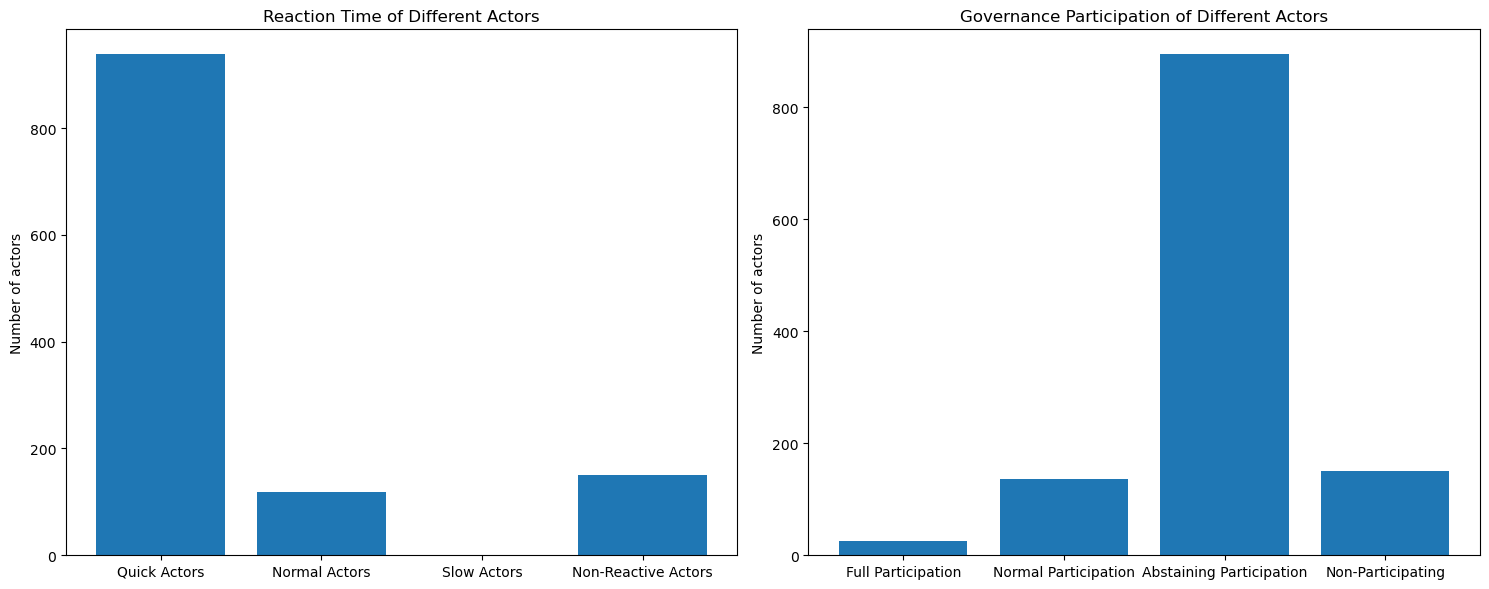

In [75]:
from model.utils.charts import create_bar_charts

values = [
    "total_quick_actors_reaction_time",
    "total_normal_actors_reaction_time",
    "total_slow_actors_reaction_time",
    "total_non_reactive_actors_reaction_time",
]
values_2 = [
    "total_full_governance_participants",
    "total_normal_governance_participants",
    "total_abstaining_governance_participants",
    "total_non_participating_governance_participants",
]

labels = ["Quick Actors", "Normal Actors", "Slow Actors", "Non-Reactive Actors"]
labels_2 = ["Full Participation", "Normal Participation", "Abstaining Participation", "Non-Participating"]

chart_1 = (values, labels, "Reaction Time of Different Actors", "Number of actors")
chart_2 = (values_2, labels_2, "Governance Participation of Different Actors", "Number of actors")

create_bar_charts(post_processing, chart_1, chart_2)

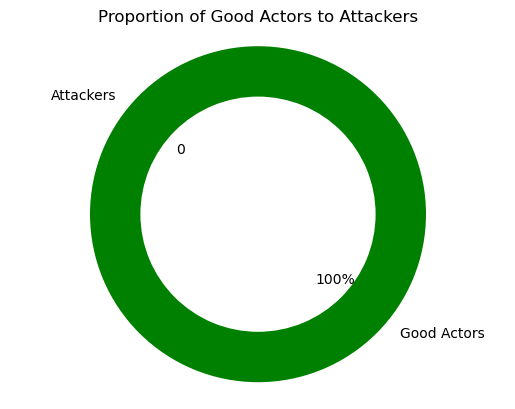

In [73]:
labels = "Good Actors", "Attackers"
sizes = ["total_stETH_good_actors", "total_attackers"]
values = [getattr(post_processing, attr).tail(1).values[0] for attr in sizes]
colors = ["green", "red"]
autopct = lambda p: f"{p:.0f}%" if p > 0 else "0"

plt.pie(
    values,
    labels=labels,
    colors=colors,
    autopct=lambda p: f"{p:.0f}%" if p > 0 else "0",
    startangle=140,
    wedgeprops=dict(
        width=0.3,
    ),
)

plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Proportion of Good Actors to Attackers")
plt.show()

In [173]:
post_processing.tail(5)

,timestep,run,proposals_submitted_count,proposals_executed_count,proposals_canceled_count,total_actors_health,total_actors_damaged,total_actors_recovery,total_stETH_balance,total_stETH_locked,...,total_quick_actors_reaction_time,total_normal_actors_reaction_time,total_slow_actors_reaction_time,total_non_reactive_actors_reaction_time,total_full_governance_participants,total_normal_governance_participants,total_abstaining_governance_participants,total_non_participating_governance_participants,total_stETH_good_actors,total_attackers
184,46,1,1,0,1,59498.00,18390.00,18390.00,4687871.40,0.00,...,938,119,0,150,26,137,894,150,1207,0
188,47,1,1,0,1,59498.00,18390.00,18390.00,4687871.40,0.00,...,938,119,0,150,26,137,894,150,1207,0
192,48,1,1,0,1,59498.00,18390.00,18390.00,4687871.40,0.00,...,938,119,0,150,26,137,894,150,1207,0
196,49,1,1,0,1,59498.00,18390.00,18390.00,4687871.40,0.00,...,938,119,0,150,26,137,894,150,1207,0
200,50,1,1,0,1,59498.00,18390.00,18390.00,4687871.40,0.00,...,938,119,0,150,26,137,894,150,1207,0


Time from maximum normalized_damaged to maximum combined_percentage_locked: 3 hours (0.12 days)


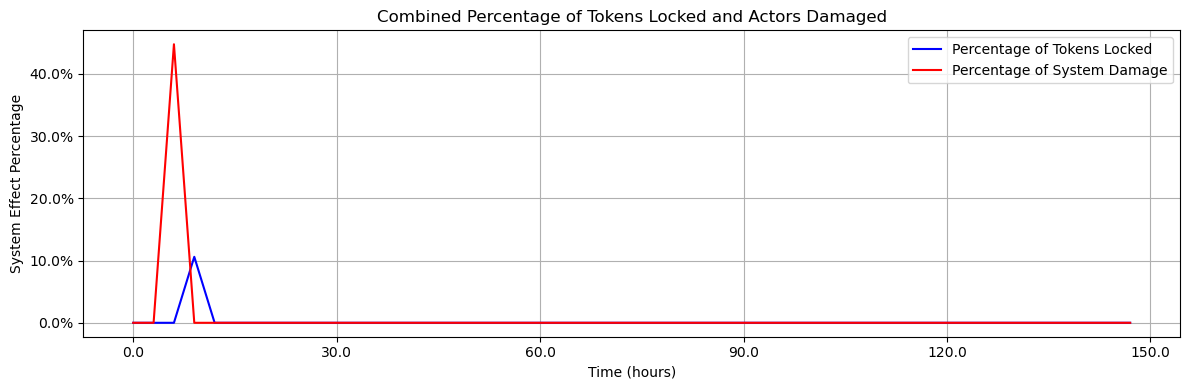

In [151]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

total_stETH_balance = post_processing["total_stETH_balance"]
total_stETH_locked = post_processing["total_stETH_locked"]
total_wstETH_balance = post_processing["total_wstETH_balance"]
total_wstETH_locked = post_processing["total_wstETH_locked"]
total_actors_damaged = post_processing["total_actors_damaged"]
total_actors_health = post_processing["total_actors_health"]
total_actors_recovery = post_processing["total_actors_recovery"]
timesteps = range(len(total_stETH_balance))

percentage_stETH_locked = [locked / balance for locked, balance in zip(total_stETH_locked, total_stETH_balance)]
percentage_wstETH_locked = [locked / balance for locked, balance in zip(total_wstETH_locked, total_wstETH_balance)]
combined_percentage_locked = [
    stETH + wstETH for stETH, wstETH in zip(percentage_stETH_locked, percentage_wstETH_locked)
]

normalized_damaged = [
    (damaged - recovery) / health
    for damaged, recovery, health in zip(total_actors_damaged, total_actors_recovery, total_actors_health)
]

max_normalized_damaged_idx = normalized_damaged.index(max(normalized_damaged))
max_normalized_damaged_ts = timesteps[max_normalized_damaged_idx]

max_combined_percentage_locked_idx = combined_percentage_locked.index(max(combined_percentage_locked))
max_combined_percentage_locked_ts = timesteps[max_combined_percentage_locked_idx]

time_difference = max_combined_percentage_locked_ts - max_normalized_damaged_ts
time_difference_hours = time_difference * 3
time_difference_days = time_difference_hours / 24

print(
    f"Time from maximum normalized_damaged to maximum combined_percentage_locked: {time_difference_hours} hours ({time_difference_days:.2f} days)"
)

plt.figure(figsize=(12, 4))

plt.plot(timesteps, combined_percentage_locked, color="blue", label="Percentage of Tokens Locked")
plt.xlabel("Time (hours)")
plt.ylabel("Percentage of Tokens Locked")
plt.title("Combined Percentage of Tokens Locked and Actors Damaged")
plt.grid(True)

plt.plot(timesteps, normalized_damaged, color="red", label="Percentage of System Damage")
plt.xlabel("Time (hours)")
plt.ylabel("System Effect Percentage")
plt.legend()
plt.grid(True)

plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1.0))
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x * 3}"))

plt.tight_layout()
plt.show()

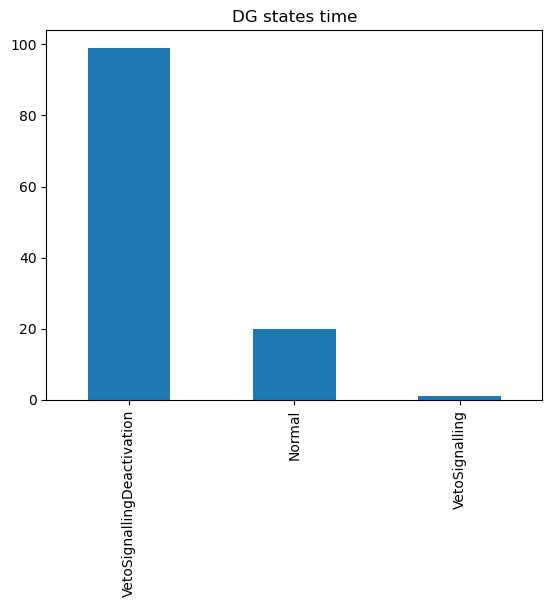

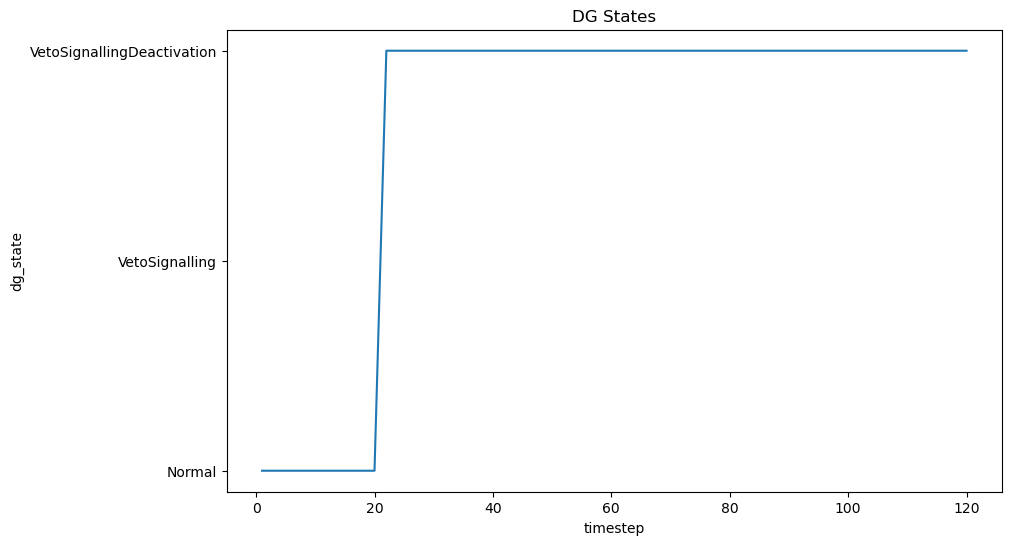

In [19]:
state_plot(post_processing, "timestep", "dg_state", 1)

In [174]:
def aggregate_runs(df, aggregate_dimension):
    df_copy = df.copy()
    df_copy = df_copy.drop(columns=["current_time"])
    mean_df = df_copy.groupby(aggregate_dimension).mean(numeric_only=True).reset_index()
    median_df = df_copy.groupby(aggregate_dimension).median(numeric_only=True).reset_index()
    std_df = df_copy.groupby(aggregate_dimension).std(numeric_only=True).reset_index()
    min_df = df_copy.groupby(aggregate_dimension).min(numeric_only=True).reset_index()

    mean_df.loc[:, "current_time"] = df["current_time"]
    median_df.loc[:, "current_time"] = df["current_time"]
    std_df.loc[:, "current_time"] = df["current_time"]
    min_df.loc[:, "current_time"] = df["current_time"]
    return mean_df, median_df, std_df, min_df


def monte_carlo_plot(df, aggregate_dimension, x, y, runs):
    """
    A function that generates timeseries plot of Monte Carlo runs.

    Parameters:
    df: dataframe name
    aggregate_dimension: the dimension you would like to aggregate on, the standard one is timestep.
    x = x axis variable for plotting
    y = y axis variable for plotting
    run_count = the number of monte carlo simulations

    Example run:
    monte_carlo_plot(df,'timestep','timestep','revenue',run_count=100)
    """
    mean_df, median_df, std_df, min_df = aggregate_runs(df, aggregate_dimension)
    plt.figure(figsize=(10, 6))
    for r in range(1, runs + 1):
        legend_name = "Run " + str(r)
        plt.plot(df[df.run == r][x], df[df.run == r][y], label=legend_name)
    plt.plot(mean_df[x], mean_df[y], label="Mean", color="black")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
    plt.xlabel(x)
    plt.ylabel(y)
    title_text = "Performance of " + y + " over " + str(runs) + " Monte Carlo Runs"
    plt.title(title_text)

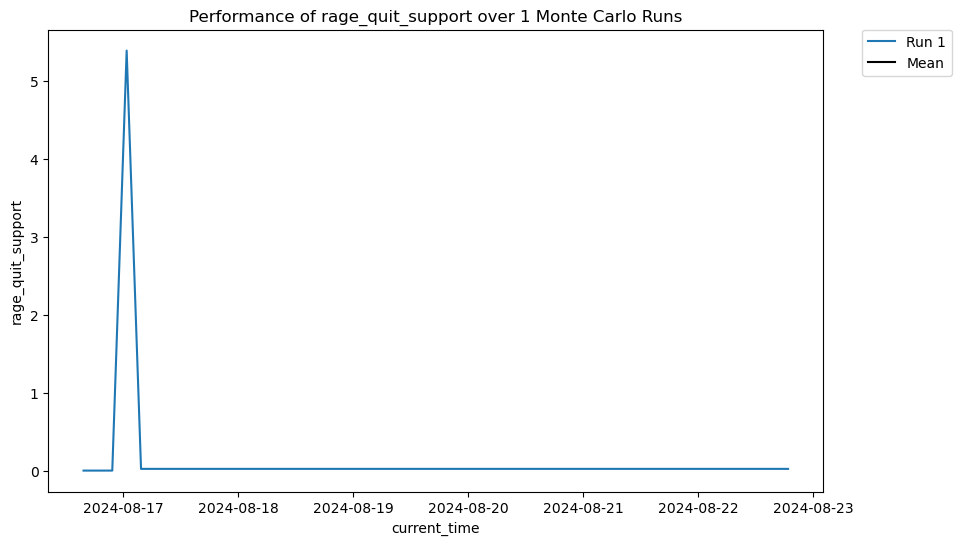

In [176]:
monte_carlo_plot(post_processing, "timestep", "current_time", "rage_quit_support", 1)

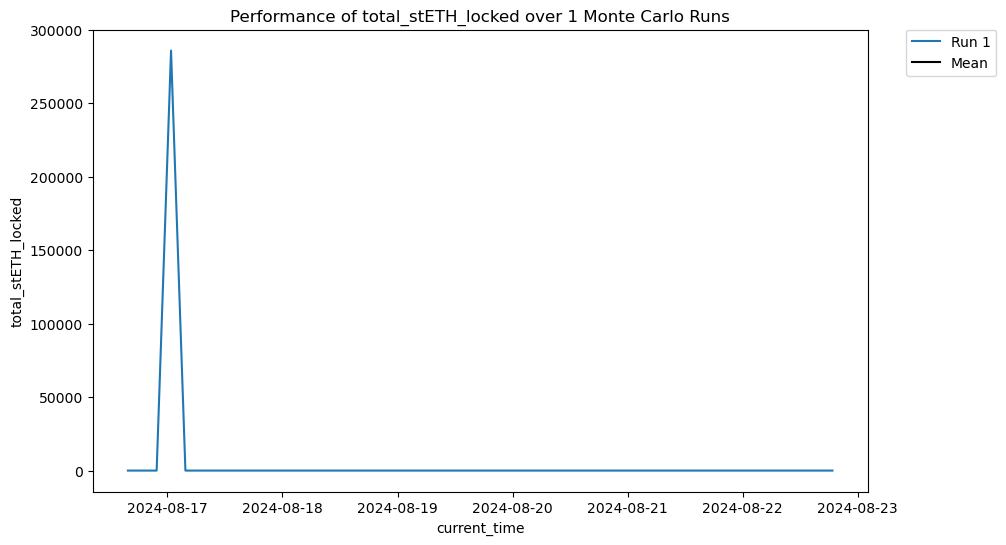

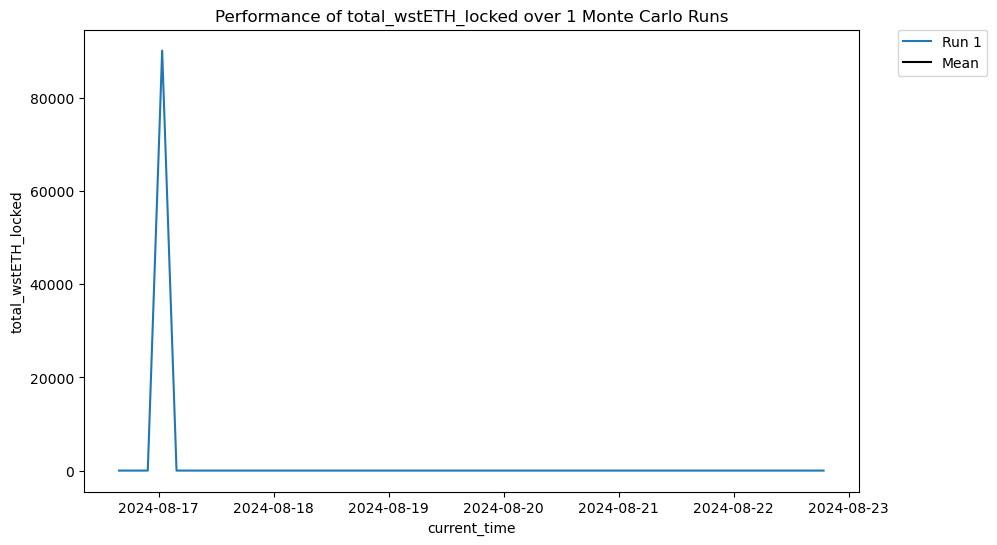

In [178]:
monte_carlo_plot(post_processing, "timestep", "current_time", "total_stETH_locked", 1)
monte_carlo_plot(post_processing, "timestep", "current_time", "total_wstETH_locked", 1)